<a href="https://colab.research.google.com/github/peeka-boo0/ml-learning-journey/blob/main/notebooks/Day_9_gridsearchcv_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd


#loadind the data
iris = load_iris()

#inishiling the model
tree_model = DecisionTreeClassifier()

#giving parameters
param_grid  = {  'max_depth': [1,2,3,4,5,6,7,8,9],
              'min_samples_split': [2,4,6,8,10]
              }
#hyperarametring my gridsearchcv

grid_search = GridSearchCV(tree_model,param_grid,cv=5,scoring='accuracy')


#traning the model
grid_search.fit(iris.data,iris.target)

#printing the best parameters and the score
print("The best parameters are :", grid_search.best_params_)
print("The best score is :", grid_search.best_score_)

#Make results more readable
print(pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score']])



The best parameters are : {'max_depth': 3, 'min_samples_split': 2}
The best score is : 0.9733333333333334
                                       params  mean_test_score
0    {'max_depth': 1, 'min_samples_split': 2}         0.666667
1    {'max_depth': 1, 'min_samples_split': 4}         0.666667
2    {'max_depth': 1, 'min_samples_split': 6}         0.666667
3    {'max_depth': 1, 'min_samples_split': 8}         0.666667
4   {'max_depth': 1, 'min_samples_split': 10}         0.666667
5    {'max_depth': 2, 'min_samples_split': 2}         0.933333
6    {'max_depth': 2, 'min_samples_split': 4}         0.933333
7    {'max_depth': 2, 'min_samples_split': 6}         0.933333
8    {'max_depth': 2, 'min_samples_split': 8}         0.933333
9   {'max_depth': 2, 'min_samples_split': 10}         0.933333
10   {'max_depth': 3, 'min_samples_split': 2}         0.973333
11   {'max_depth': 3, 'min_samples_split': 4}         0.960000
12   {'max_depth': 3, 'min_samples_split': 6}         0.973333
13   {'max_d

In [22]:
#practice problem

from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


#loading data
digits = load_digits() #the () need cozz dataset in sklearn are functions

#inishlizing model

tree_model = RandomForestClassifier()

#giving parameters
param_grid  = {
    'max_depth': [30,60,90],#value = 3   # the deepth of the trees i have put the deept a lill high cozz this data set is big
    'min_samples_split': [2,3],#value = 2  # the minimum spilt of the data
    'n_estimators': [800,1000], #value = 2  # number of trees i again put this a lill to high for more acc data 20-50 will be good good
    'max_features': ['sqrt', 'log2'] #value = 2 # skiped 'auto'
}
   # 3 * 2 * 2 * 2 =24 models cv=5 => 24*5 =120fits


#tuning the model
grid_search = GridSearchCV(tree_model,param_grid,cv=5,scoring='accuracy',n_jobs=-1)


#traning the model
grid_search.fit(digits.data,digits.target)

#printing the score
print("The best parameters are :", grid_search.best_params_)
print("The best score is :", grid_search.best_score_)

#printing the all combination scores
#print(pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score']])


The best parameters are : {'max_depth': 60, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 800}
The best score is : 0.9443686165273908


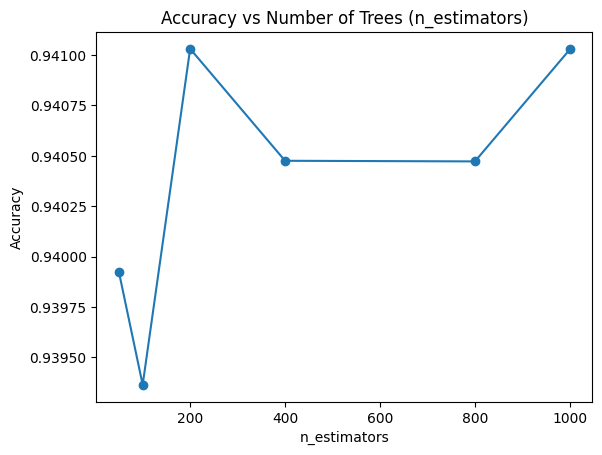

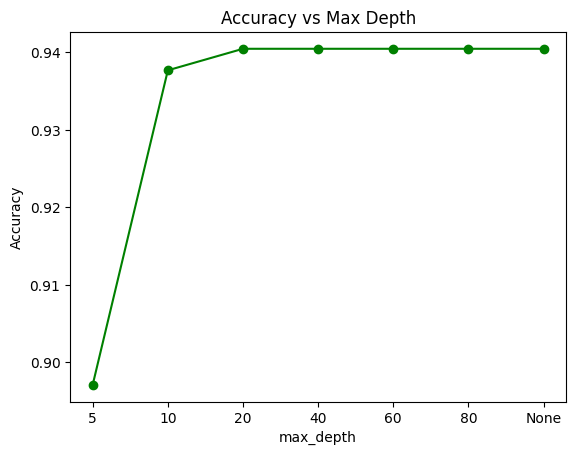

In [23]:
#this is the plot of n_estimator and the deepth

from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
digits = load_digits()

X, y = digits.data, digits.target

# 1️⃣ Accuracy vs n_estimators
n_estimators_range = [50, 100, 200, 400, 800, 1000]
scores_n = []

for n in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n, max_depth=20, random_state=42)
    score = cross_val_score(model, X, y, cv=5, scoring="accuracy").mean()
    scores_n.append(score)

plt.plot(n_estimators_range, scores_n, marker="o")
plt.title("Accuracy vs Number of Trees (n_estimators)")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()


# 2️⃣ Accuracy vs max_depth
max_depth_range = [5, 10, 20, 40, 60, 80, None]  # None = unlimited depth
scores_d = []

for d in max_depth_range:
    model = RandomForestClassifier(n_estimators=300, max_depth=d, random_state=42)
    score = cross_val_score(model, X, y, cv=5, scoring="accuracy").mean()
    scores_d.append(score)

# Convert "None" to string for plotting
labels = [str(d) for d in max_depth_range]

plt.plot(labels, scores_d, marker="o", color="green")
plt.title("Accuracy vs Max Depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.show()
